In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Sales_Transaction.csv")

In [5]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
num_records = df.shape[0]
unique_values = df['ProductName'].unique()
total_unique_values = len(unique_values)
min_date = df['Date'].min()
max_date = df['Date'].max()

print("Number of records:", num_records)
print("Total products:", total_unique_values)
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Number of records: 536350
Total products: 3768
Minimum Date: 2018-12-01 00:00:00
Maximum Date: 2019-12-09 00:00:00


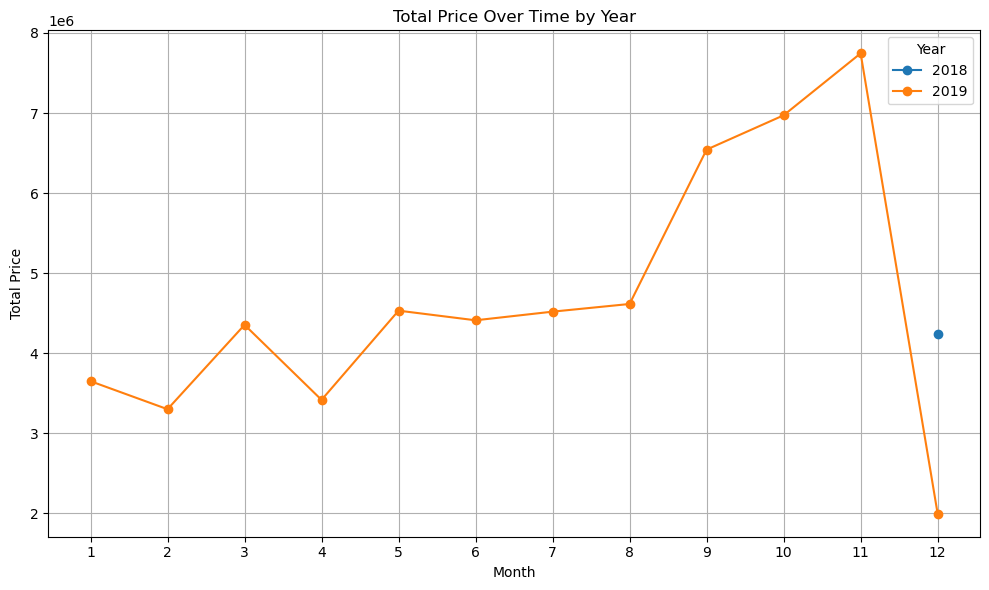

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate total price for each purchase
df['TotalPrice'] = df['Quantity'] * df['Price']

# Group data by 'Year' and 'Month' and sum the total prices
yearly_monthly_total_price = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Iterate over each year
for year in yearly_monthly_total_price['Year'].unique():
    yearly_data = yearly_monthly_total_price[yearly_monthly_total_price['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['TotalPrice'], marker='o', label=str(year))

plt.title('Total Price Over Time by Year')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.xticks(range(1, 13))  # Set x-ticks to represent months
plt.tight_layout()
plt.show()

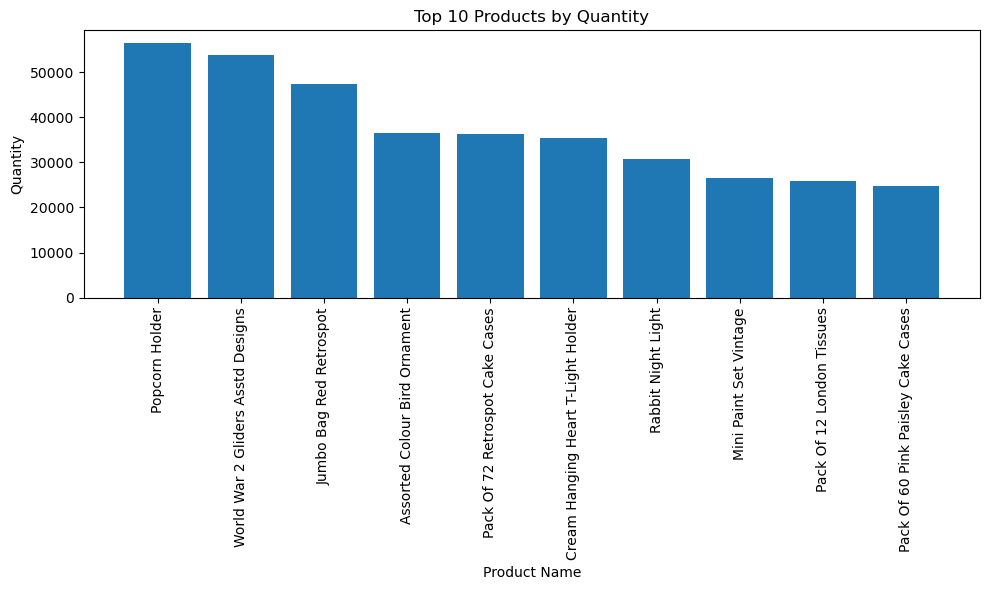

In [11]:
product_quantity = df.groupby('ProductName')['Quantity'].sum()

# Select top 10 products by quantity
top_10_products = product_quantity.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(top_10_products.index, top_10_products.values)
plt.title('Top 10 Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


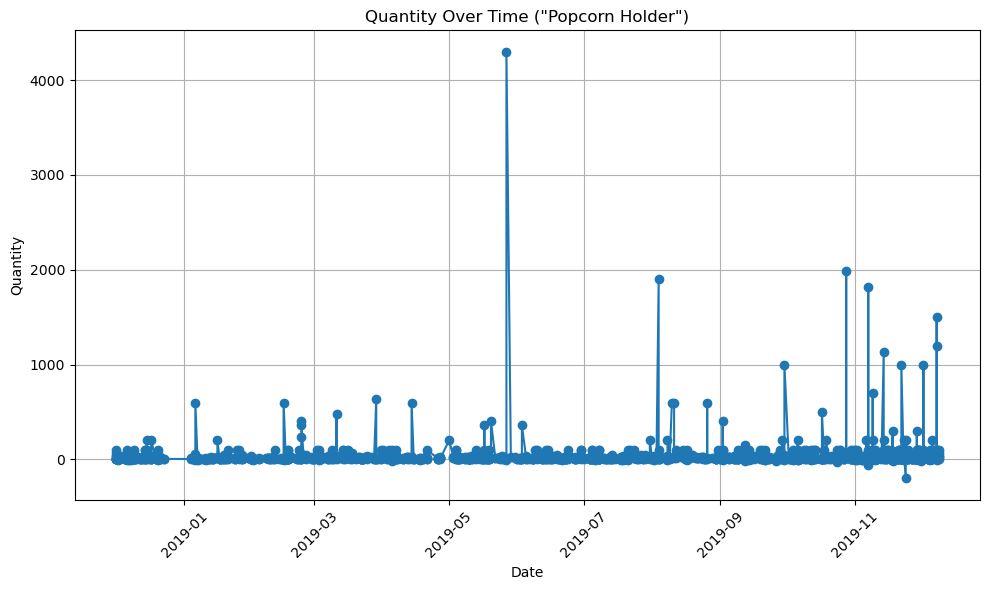

In [13]:
product_df = df[df["ProductName"] == "Popcorn Holder"]

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.plot(product_df['Date'], product_df['Quantity'], marker='o', linestyle='-')
plt.title('Quantity Over Time ("Popcorn Holder")')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the first graph

This graph represents the quantity of "Popcorn Holders" sold over time, with the date on the x-axis and the quantity on the y-axis. Here are some key observations:

General Trend:

Throughout the year 2019, there are fluctuations in the quantity of popcorn holders sold, with several notable spikes.
Major Spikes:

There is a significant spike in sales around early May 2019, where the quantity sold peaks at over 4000 units.
Other notable spikes occur around mid-July and late October to early November, with quantities reaching up to around 1000 units.
Sales Pattern:

Between the spikes, the sales quantities are generally lower and more consistent.
The consistent lower points suggest regular, albeit smaller, quantities of popcorn holders being sold.
Possible Influences:

The large spike in early May could be due to a specific event, promotion, or seasonality (e.g., a holiday or special sale).
The other spikes might also correspond to events or promotions.
In summary, while the overall sales of popcorn holders are generally steady, there are certain periods with significant increases in quantity sold, likely driven by external factors such as events, promotions, or seasonal demand.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7988\1148380587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Date'] = pd.to_datetime(product_df['Date'])


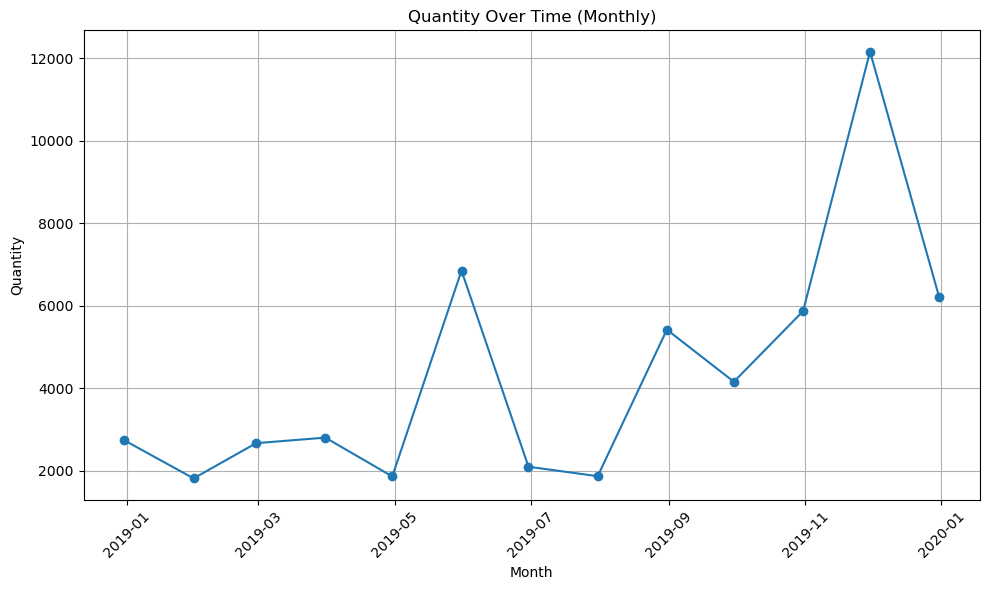

In [17]:
product_df['Date'] = pd.to_datetime(product_df['Date'])
monthly_data = product_df.resample('ME', on='Date').sum()

plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o', linestyle='-')
plt.title('Quantity Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the second graph

This graph represents the monthly quantity of "Popcorn Holders" sold over time, with the month on the x-axis and the quantity on the y-axis. Here are some key observations:

General Trend:

There is a significant fluctuation in the monthly sales of popcorn holders throughout 2019.
Major Peaks:

May 2019: There is a sharp increase in sales, peaking at around 7000 units.
December 2019: Another significant peak, with sales reaching nearly 12000 units.
Sales Pattern:

The beginning of the year starts with relatively steady sales around 2000 units.
A dip occurs in March, followed by a slight increase in April.
After the May peak, there is a notable decrease in June, with a subsequent minor rise and fall until a low point in August.
Sales start to pick up again from September, with a steep increase through October and November, culminating in the December peak.
Possible Influences:

The peak in May might be due to a promotional event, marketing campaign, or a seasonal demand spike.
The significant rise in November and December could be attributed to holiday season shopping, where gifts and home accessories like popcorn holders
are popular purchases.
In summary, the monthly sales data shows significant fluctuations, with notable peaks in May and December. These peaks are likely influenced by specific promotions, seasonal trends, or holiday shopping behaviors. The sales trend indicates periods of both steady and sporadic increases in demand for popcorn holders.

In [20]:
# Customer Analysis in section of Popcorn Holder product

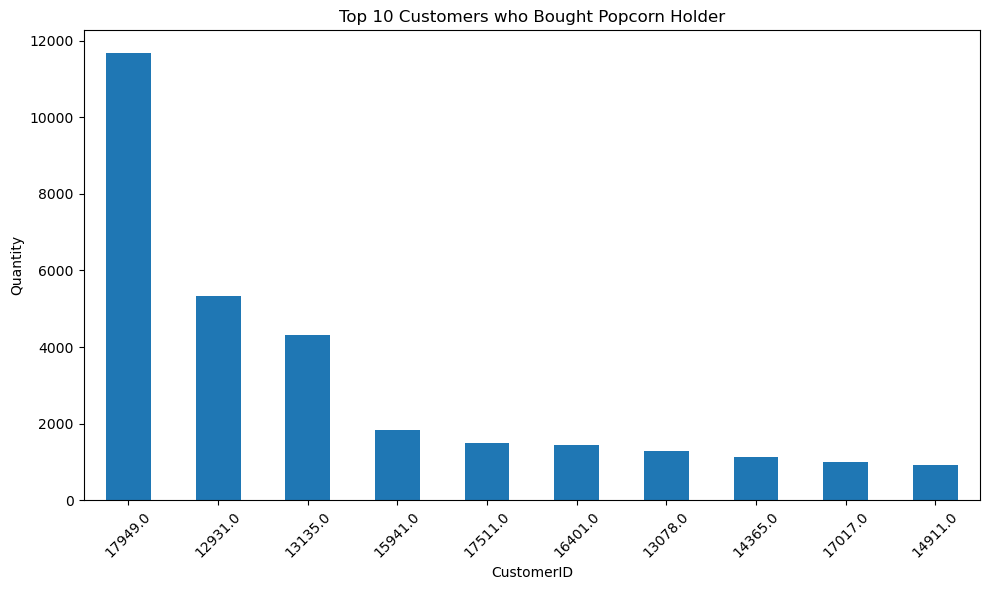

In [22]:
popcorn_holder_data = df[df['ProductName'] == 'Popcorn Holder']

# Group data by 'CustomerNo' and sum the quantities
customer_quantity = popcorn_holder_data.groupby('CustomerNo')['Quantity'].sum()

# Find the top 10 customers who bought "Popcorn Holder"
top_10_customers = customer_quantity.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed
top_10_customers.plot(kind='bar')
plt.title('Top 10 Customers who Bought Popcorn Holder')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7988\1773550913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Year_Month'] = pd.to_datetime(customer_data['Date']).dt.to_period('M')


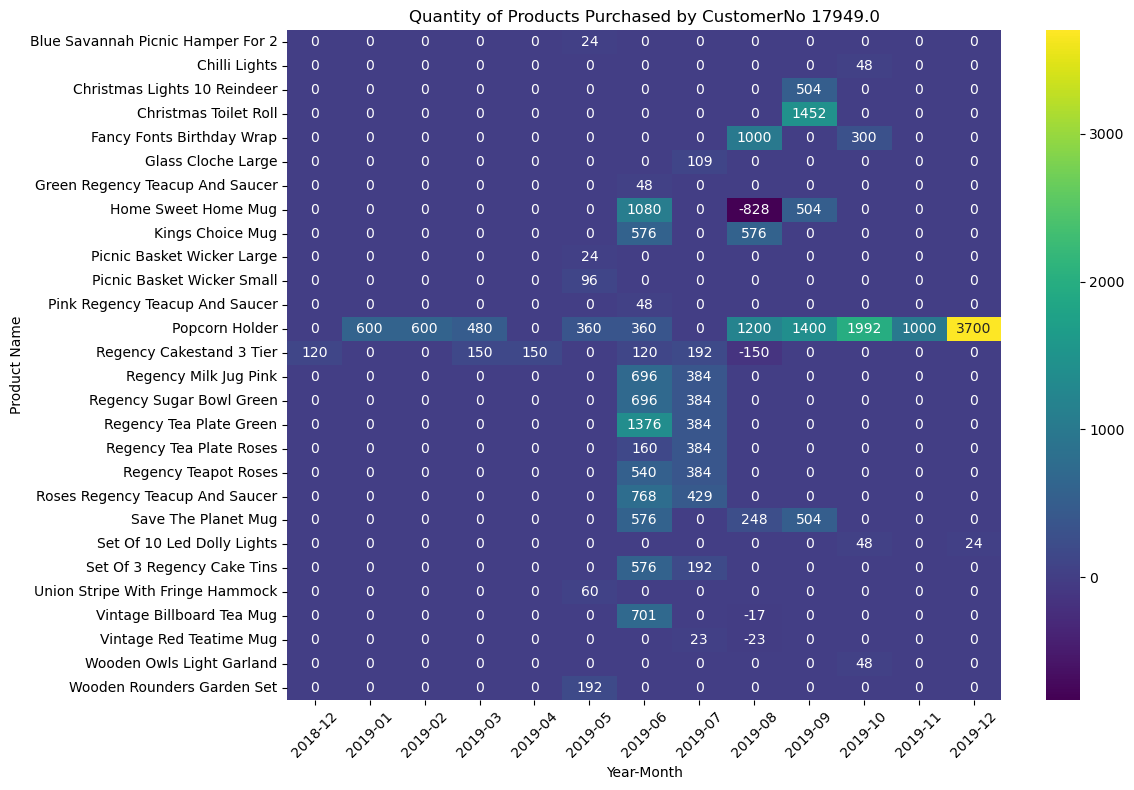

In [24]:
customer_data = df[df['CustomerNo'] == 17949.0]

customer_data['Year_Month'] = pd.to_datetime(customer_data['Date']).dt.to_period('M')

customer_product_quantity = customer_data.pivot_table(index='ProductName', columns='Year_Month', values='Quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(customer_product_quantity, cmap='viridis', annot=True, fmt='d')
plt.title('Quantity of Products Purchased by CustomerNo 17949.0')
plt.xlabel('Year-Month')
plt.ylabel('Product Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter transactions for Popcorn Holder between months 5 and 6
popcorn_transactions = df[(df['ProductName'] == 'Popcorn Holder') & (df['Date'].dt.month.between(5, 6))]

# Group by date and sum the quantities sold
sales_by_date = popcorn_transactions.groupby('Date')['Quantity'].sum()

# Find the date with the highest total quantity sold
top_date = sales_by_date.idxmax()

# Display the top date and its sales
print("Top Date with Best Sales of Popcorn Holder:")
print("Date:", top_date)
print("Total Quantity Sold:", sales_by_date[top_date])

Top Date with Best Sales of Popcorn Holder:
Date: 2019-05-27 00:00:00
Total Quantity Sold: 4313


In [28]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter transactions for the product "Popcorn Holder" on the date 2019-05-27
popcorn_holder_transactions_2019_05_27 = df[(df['Date'] == '2019-05-27') & (df['ProductName'] == 'Popcorn Holder')]

# Display the transactions for the product "Popcorn Holder" on the date 2019-05-27
print("Transactions for Popcorn Holder on 2019-05-27:")
print(popcorn_holder_transactions_2019_05_27)

Transactions for Popcorn Holder on 2019-05-27:
       TransactionNo       Date ProductNo     ProductName  Price  Quantity  \
331834        554868 2019-05-27     22197  Popcorn Holder  10.99      4300   
332493        554958 2019-05-27     22197  Popcorn Holder  11.92         8   
332545        554960 2019-05-27     22197  Popcorn Holder  11.92         4   
332588        554961 2019-05-27     22197  Popcorn Holder  11.92         2   
332784       C554925 2019-05-27     22197  Popcorn Holder  11.12        -1   

        CustomerNo         Country  Year  Month  TotalPrice  
331834     13135.0  United Kingdom  2019      5    47257.00  
332493     12958.0  United Kingdom  2019      5       95.36  
332545     12960.0  United Kingdom  2019      5       47.68  
332588     15961.0  United Kingdom  2019      5       23.84  
332784     17272.0  United Kingdom  2019      5      -11.12  


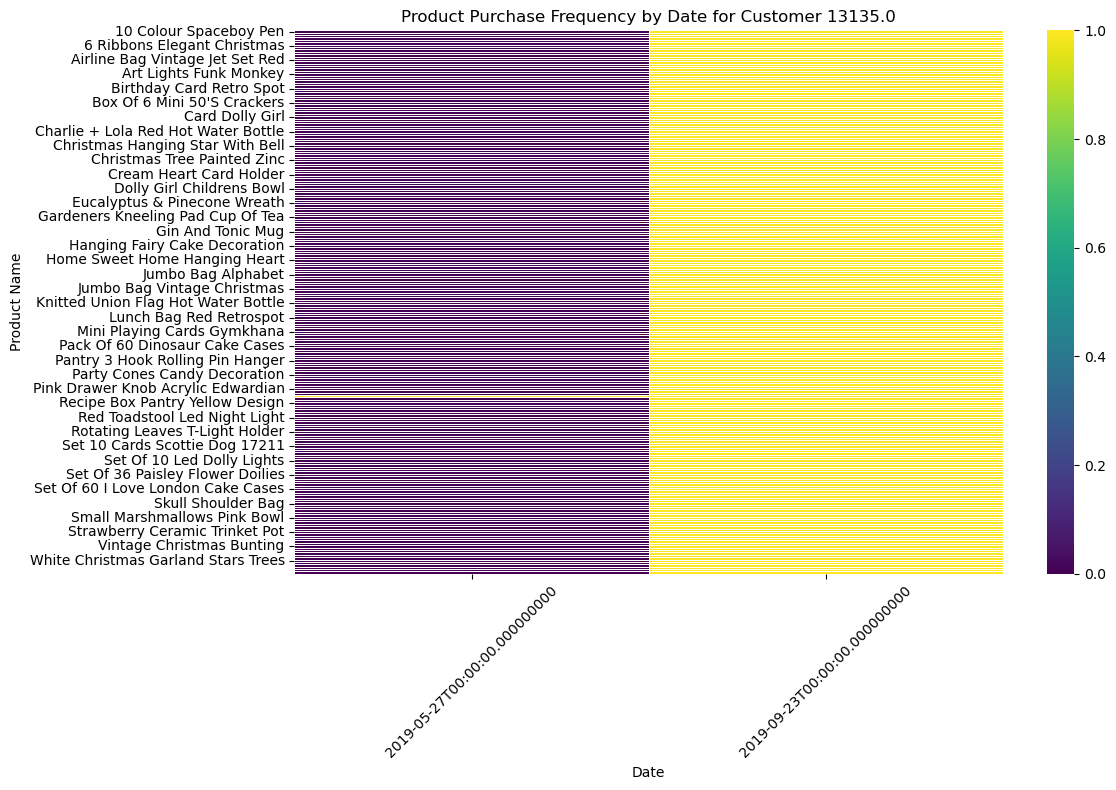

In [30]:
customer_data = df[df['CustomerNo'] == 13135.0]

# Pivot the filtered DataFrame to create a matrix of product purchases by date
pivot_table = customer_data.pivot_table(index='ProductName', columns='Date', aggfunc='size', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.5)
plt.title('Product Purchase Frequency by Date for Customer 13135.0')
plt.xlabel('Date')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


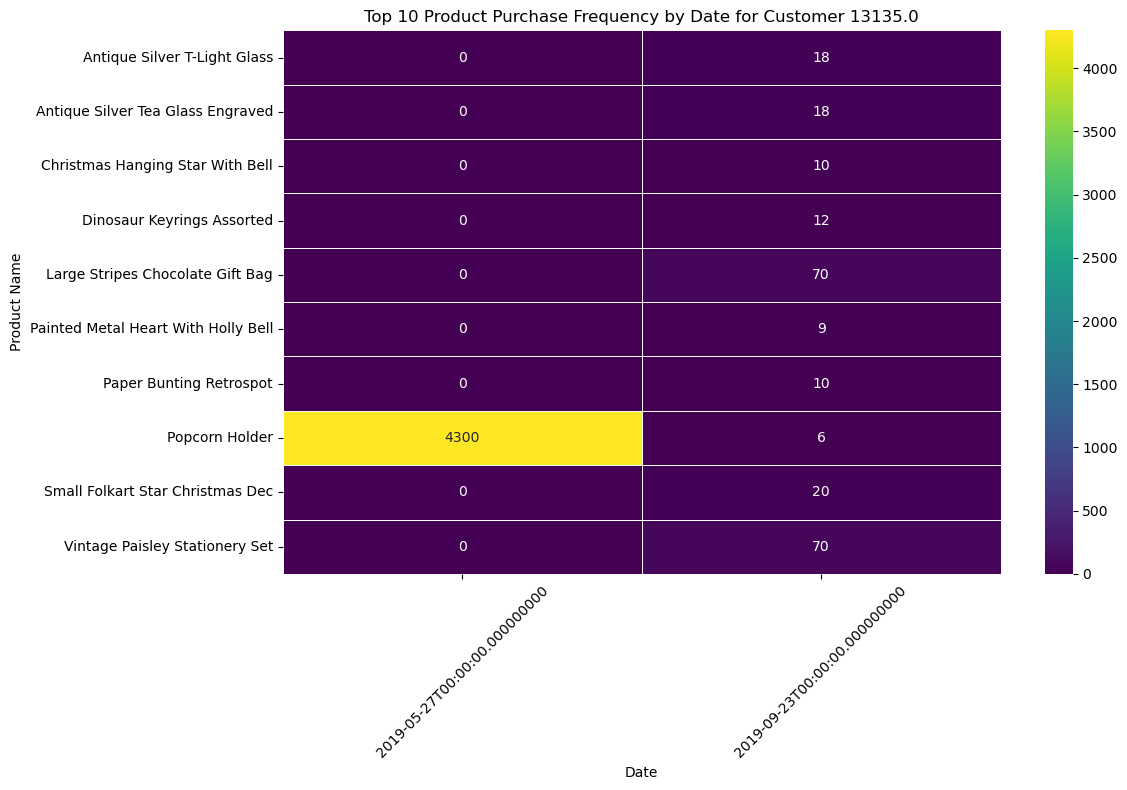

In [32]:
customer_data = df[df['CustomerNo'] == 13135.0]

# Group data by product name and sum the quantity
product_quantity = customer_data.groupby('ProductName')['Quantity'].sum()

# Select top 10 products
top_10_products = product_quantity.nlargest(10)

# Filter customer data for top 10 products
top_10_customer_data = customer_data[customer_data['ProductName'].isin(top_10_products.index)]

# Pivot the filtered DataFrame to create a matrix of product purchases by date
pivot_table = top_10_customer_data.pivot_table(index='ProductName', columns='Date', values='Quantity', aggfunc='sum', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.5, annot=True, fmt='d')
plt.title('Top 10 Product Purchase Frequency by Date for Customer 13135.0')
plt.xlabel('Date')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
customer_data = df[df['CustomerNo'] == 13135.0]

# Get unique dates for the customer's transactions
unique_dates = customer_data['Date'].unique()

# Display the unique dates
print("Dates for customer 13135.0:")
print(unique_dates)

Dates for customer 13135.0:
<DatetimeArray>
['2019-09-23 00:00:00', '2019-05-27 00:00:00']
Length: 2, dtype: datetime64[ns]
